In [1]:
# General Imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sklearn packages
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings("ignore")

%load_ext autoreload
%autoreload 2

In [2]:
train_df = pd.read_csv("./data/train_data_after_EDA.csv", index_col="Claim Identifier")

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 574025 entries, 5393875 to 6165075
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Age at Injury                   574025 non-null  float64
 1   Alternative Dispute Resolution  574025 non-null  float64
 2   Attorney/Representative         574025 non-null  int64  
 3   Average Weekly Wage             545374 non-null  float64
 4   Carrier Name                    574025 non-null  float64
 5   Carrier Type                    574025 non-null  int64  
 6   Claim Injury Type               574025 non-null  int64  
 7   County of Injury                574025 non-null  float64
 8   COVID-19 Indicator              574025 non-null  int64  
 9   District Name                   574025 non-null  float64
 10  Gender                          574025 non-null  float64
 11  IME-4 Count                     132803 non-null  float64
 12  Industry Code 

In [4]:
X = train_df.drop(["Claim Injury Type"], axis = 1)
y = train_df["Claim Injury Type"]

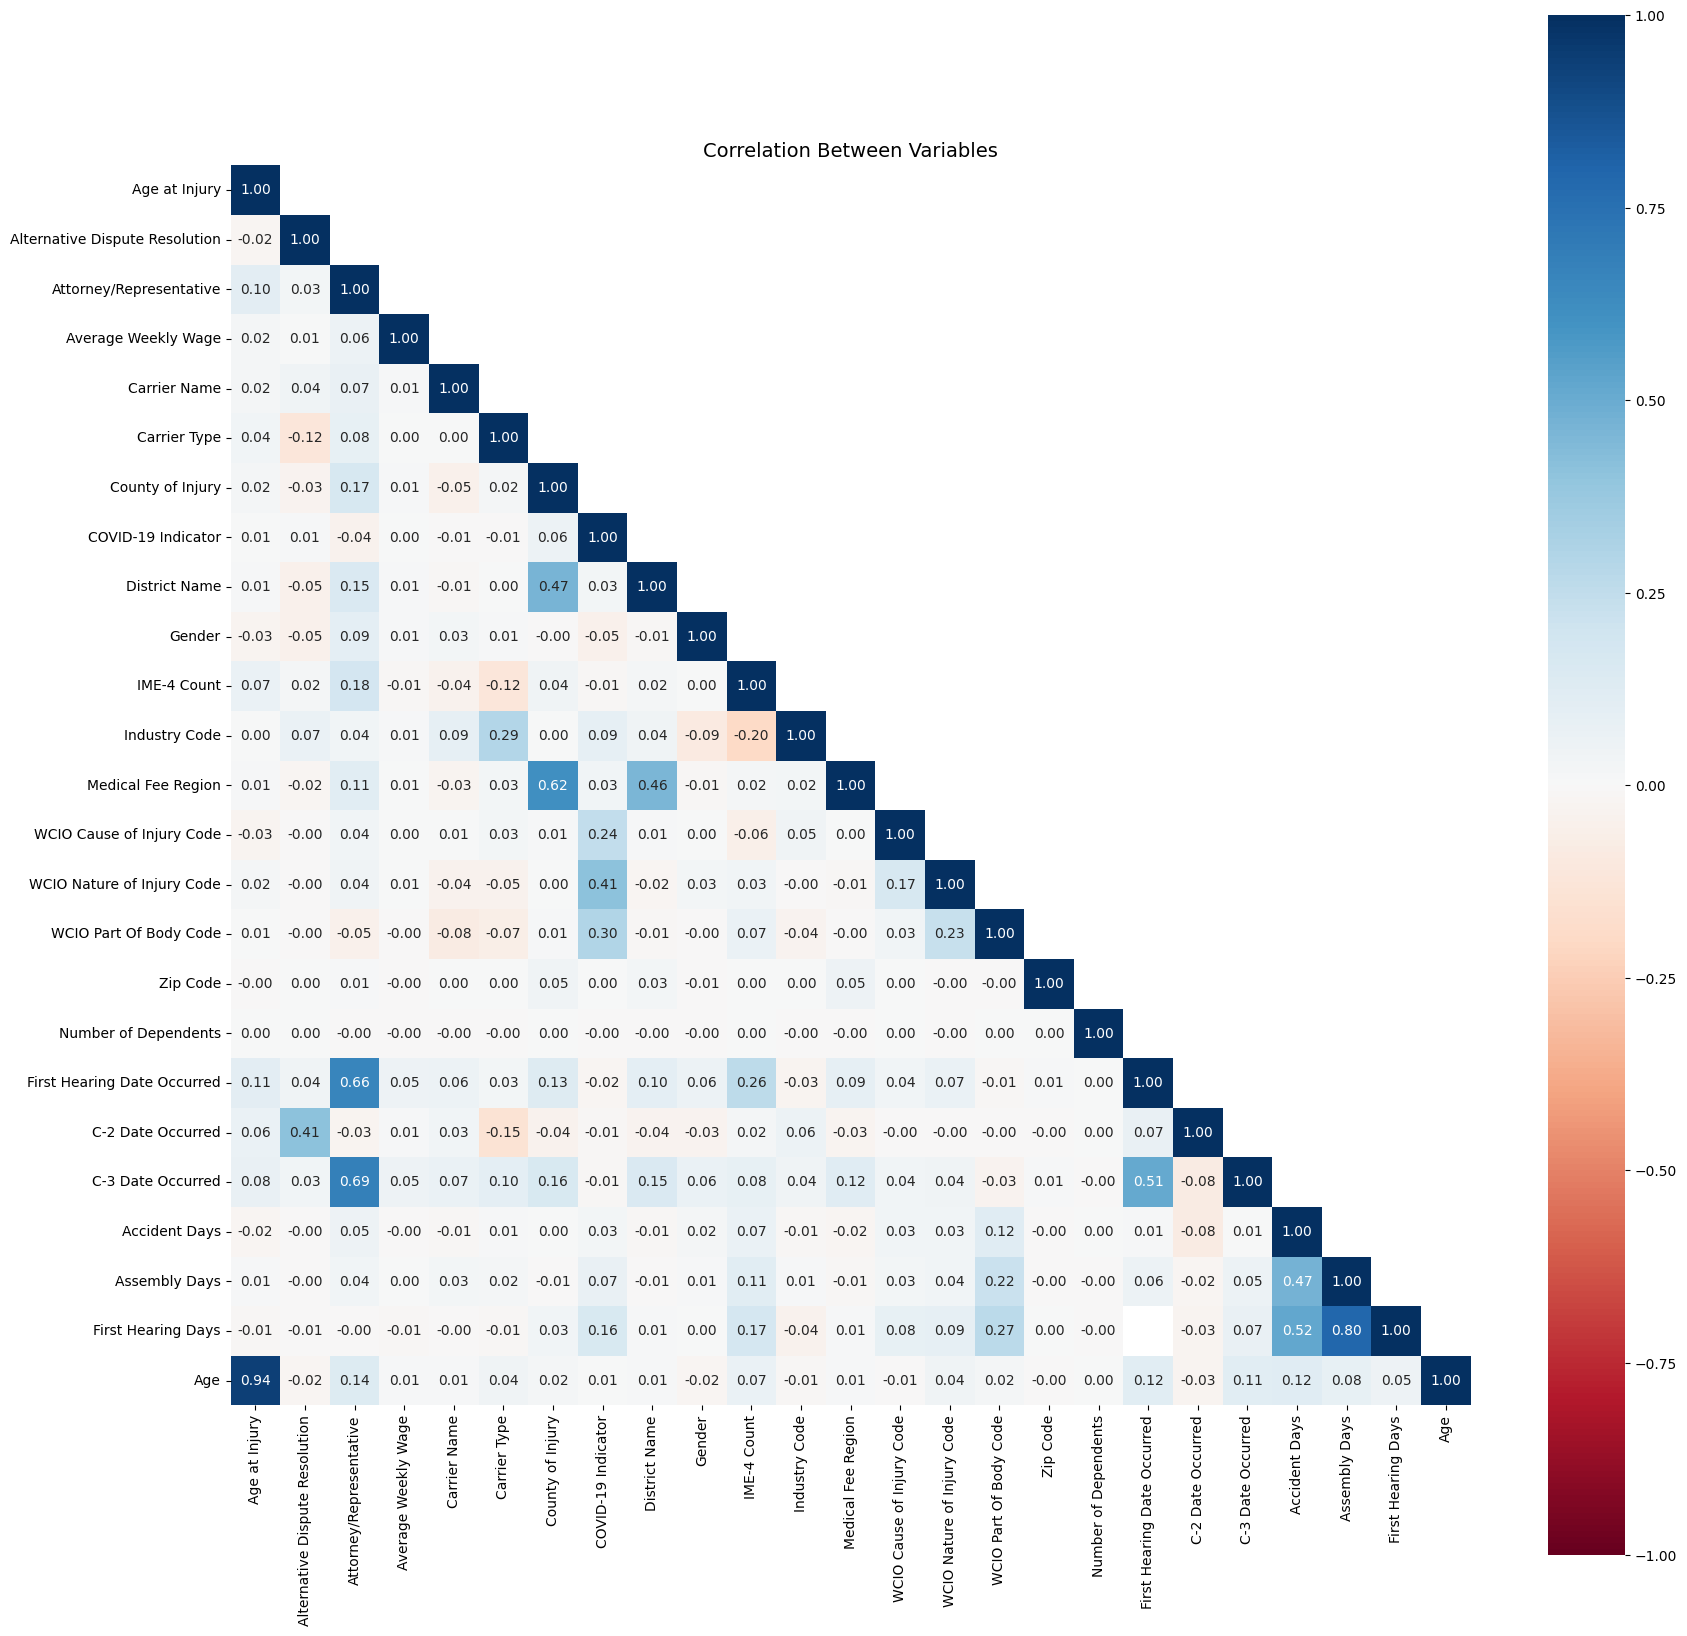

In [5]:
# initial correlation matrix with the respective values
corr_matrix = X.corr()

mask = np.tri(*corr_matrix.shape, k=0, dtype=bool)
# Keeps values where mask is True
corr_matrix = corr_matrix.where(mask)

# defines the figure size
fig, ax = plt.subplots(figsize=(20, 20))
# heatmap of the initial correlation matrix
l = sns.heatmap(corr_matrix, square=True, annot=True, fmt=".2f", vmax=1, vmin=-1, cmap='RdBu', ax=ax)
plt.title('Correlation Between Variables', size=14)
plt.show()

In [6]:
X.drop(["Assembly Days","Age"],axis=1, inplace=True)

In [7]:
features_not_scale = ["Attorney/Representative", "COVID-19 Indicator", "Carrier Type", "C-2 Date Occurred", "C-3 Date Occurred",
                            "First Hearing Date Occurred"]
features_scale=[]
for col in X.columns:
    if col not in features_not_scale:
        features_scale.append(col)

In [8]:
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size = 0.25, random_state = 42, stratify = y, shuffle = True)
mm = MinMaxScaler()
X_train[features_scale] = mm.fit_transform(X_train[features_scale])
X_val[features_scale] = mm.transform(X_val[features_scale])
dt = DecisionTreeClassifier(max_depth=5, min_samples_leaf=10, random_state=None).fit(X_train, y_train)
dt_train_pred = dt.predict(X_train)
dt_val_pred = dt.predict(X_val)

print("Classification Report for Training Data:")
print(classification_report(y_train, dt_train_pred))

# Generate the classification report for validation data
print("Classification Report for Validation Data:")
print(classification_report(y_val, dt_val_pred))

Classification Report for Training Data:
              precision    recall  f1-score   support

           0       0.75      0.38      0.51      9357
           1       0.83      0.98      0.90    218308
           2       0.52      0.01      0.02     51679
           3       0.66      0.91      0.76    111380
           4       0.71      0.25      0.37     36210
           5       0.00      0.00      0.00      3158
           6       0.00      0.00      0.00        73
           7       0.00      0.00      0.00       353

    accuracy                           0.77    430518
   macro avg       0.43      0.32      0.32    430518
weighted avg       0.73      0.77      0.70    430518

Classification Report for Validation Data:
              precision    recall  f1-score   support

           0       0.75      0.39      0.52      3119
           1       0.83      0.98      0.90     72770
           2       0.55      0.01      0.02     17227
           3       0.66      0.91      0.76     

In [24]:
break

SyntaxError: 'break' outside loop (668683560.py, line 1)

In [ ]:
#train_test_split de 10%

In [ ]:
from sklearn.model_selection import StratifiedKFold

n_folds = 5
K_fold = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42)

ensemble = []
scaler_means = []
scaler_vars = []
   
for train_index, val_index in K_fold.split(x, y_encoded):
    
    x_train, x_val = x[train_index], x[val_index]
    y_train, y_val = y_encoded[train_index], y_encoded[val_index]

    #fill NA
    
    scaler = StandardScaler().fit(x_train)
    x_train = scaler.transform(x_train)
    x_val = scaler.transform(x_val)  
    
    scaler_means.append(scaler.mean_)
    scaler_vars.append(scaler.var_)

    model = DecisionTreeClassifier(max_depth=5, min_samples_leaf=10, random_state=None).fit(X_train, y_train)
    model.fit(x_train, y_train)

    # Model that can find classes with very low data
    
    ensemble.append(model)
    
    y_val_pred = model.predict(x_val)
    accuracy = accuracy_score(y_val, y_val_pred)
    print(f"Fold validation accuracy: {accuracy:.4f}")


In [ ]:
# preprocess test data

In [ ]:
final_scaler_mean = np.mean(scaler_means, axis=0)
final_scaler_var = np.mean(scaler_vars, axis=0)

final_scaler = StandardScaler()
final_scaler.mean_ = final_scaler_mean
final_scaler.scale_ = np.sqrt(final_scaler_var)

test_df = final_scaler.transform(test_df)

pred_test_probs = np.zeros((test_df.shape[0], len(label_encoder.classes_)))  # criar um array para meter as probabilidades

for model in ensemble:
    pred_test_prob = model.predict_proba(test_df) 
    pred_test_probs += pred_test_prob / n_folds 

pred_test = np.argmax(pred_test_probs, axis=1)